In [5]:
from collections import namedtuple
from glob import glob
from os.path import basename

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [6]:
all_reviews_path = '../../aspects/data/aspects/Reviews-9-products/'

In [7]:
reviews_paths = glob(all_reviews_path + '*')

In [8]:
reviews_paths

['../../aspects/data/aspects/Reviews-9-products/MicroMP3.txt',
 '../../aspects/data/aspects/Reviews-9-products/Canon S100.txt',
 '../../aspects/data/aspects/Reviews-9-products/norton.txt',
 '../../aspects/data/aspects/Reviews-9-products/Diaper Champ.txt',
 '../../aspects/data/aspects/Reviews-9-products/Hitachi router.txt',
 '../../aspects/data/aspects/Reviews-9-products/ipod.txt',
 '../../aspects/data/aspects/Reviews-9-products/Nokia 6600.txt',
 '../../aspects/data/aspects/Reviews-9-products/Linksys Router.txt',
 '../../aspects/data/aspects/Reviews-9-products/Canon PowerShot SD500.txt']

In [10]:
def load_reviews(reviews_path: str) -> pd.DataFrame:
    return pd.read_csv(reviews_path, sep='##', names=['aspects', 'text'])

In [58]:
AspectSentiment = namedtuple('AspectSentiment', 'aspect, sentiment')

def get_sentiment_from_aspect_sentiment_text(aspect_with_sentiment: str) -> AspectSentiment:
    aspect_with_sentiment = aspect_with_sentiment.strip()
    aspect_with_sentiment = aspect_with_sentiment.replace('[u]', '').replace('[s]', '').replace('[p]', '')
    aspect_with_sentiment = aspect_with_sentiment.replace('[cs]', '').replace('(cs)', '').replace('[cc]', '')
    aspect_with_sentiment = aspect_with_sentiment.replace('{', '[').replace('}', ']')
    
    aspect_splitted = aspect_with_sentiment.split('[')
    aspect = aspect_splitted[0]
    sentiment_str = aspect_splitted[1].replace(']', '')
    if '-' in sentiment_str:
        if len(sentiment_str) > 1:
            sentiment = int(sentiment_str)
        else:
            sentiment = -1
    elif '+' in sentiment_str:
        if len(sentiment_str) > 1:
            sentiment = int(sentiment_str)
        else:
            sentiment = 1
    else:
        sentiment = int(sentiment_str)
    return AspectSentiment(aspect=aspect.lower(), sentiment=sentiment)

In [60]:
def get_aspects(reviews_path: str) -> pd.DataFrame:
    all_aspects = []
    for aspect_str in list(load_reviews(reviews_path).dropna('index').aspects):
        aspects = aspect_str.split(',')
        for aspect in [a for a in aspects if len(a) > 4]:
            all_aspects.append(get_sentiment_from_aspect_sentiment_text(aspect))
    return pd.DataFrame(all_aspects)

In [61]:
def draw_aspect_distribution(reviews_path: str):
    df = get_aspects(reviews_path)
    plt.figure(figsize=(20, 8))
    plt.title(f'Aspect distribution for {basename(reviews_path)}')
    counts = df.aspect.value_counts()
    # take only aspects that appeared at least once 
    counts[counts > 1].plot(kind='bar')

../../aspects/data/aspects/Reviews-9-products/MicroMP3.txt
../../aspects/data/aspects/Reviews-9-products/Canon S100.txt


/home/lukasz/anaconda2/envs/spoken/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


../../aspects/data/aspects/Reviews-9-products/norton.txt
../../aspects/data/aspects/Reviews-9-products/Diaper Champ.txt
../../aspects/data/aspects/Reviews-9-products/Hitachi router.txt
../../aspects/data/aspects/Reviews-9-products/ipod.txt
../../aspects/data/aspects/Reviews-9-products/Nokia 6600.txt
../../aspects/data/aspects/Reviews-9-products/Linksys Router.txt
../../aspects/data/aspects/Reviews-9-products/Canon PowerShot SD500.txt


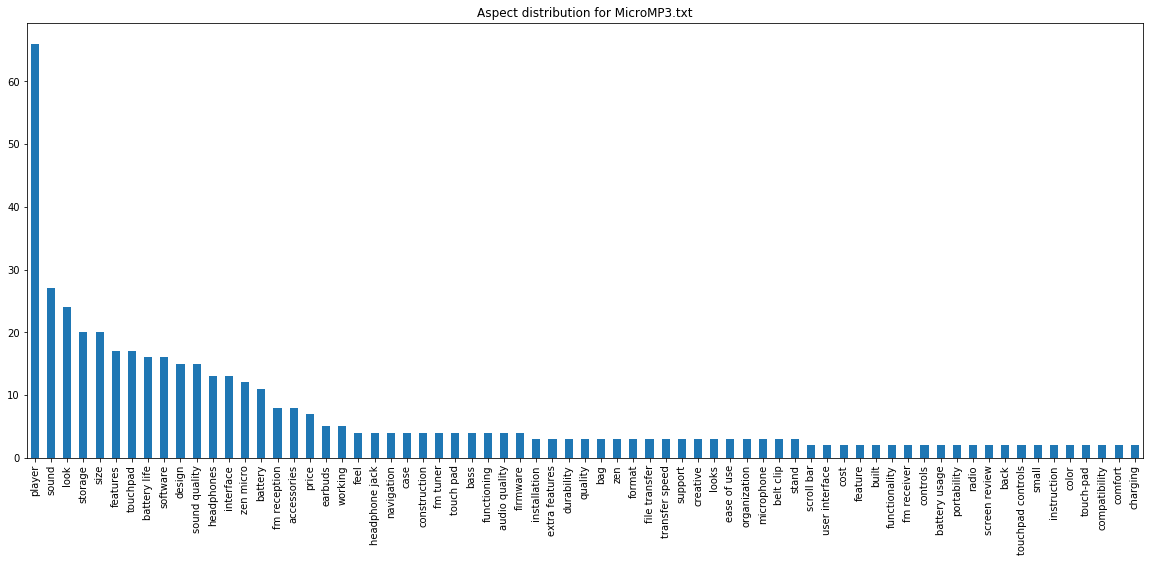

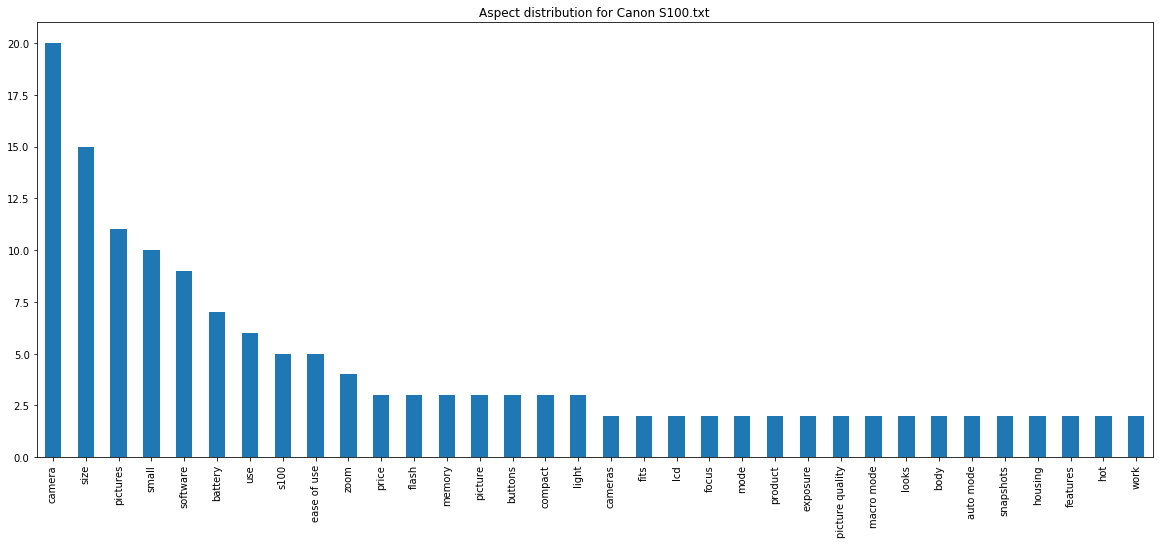

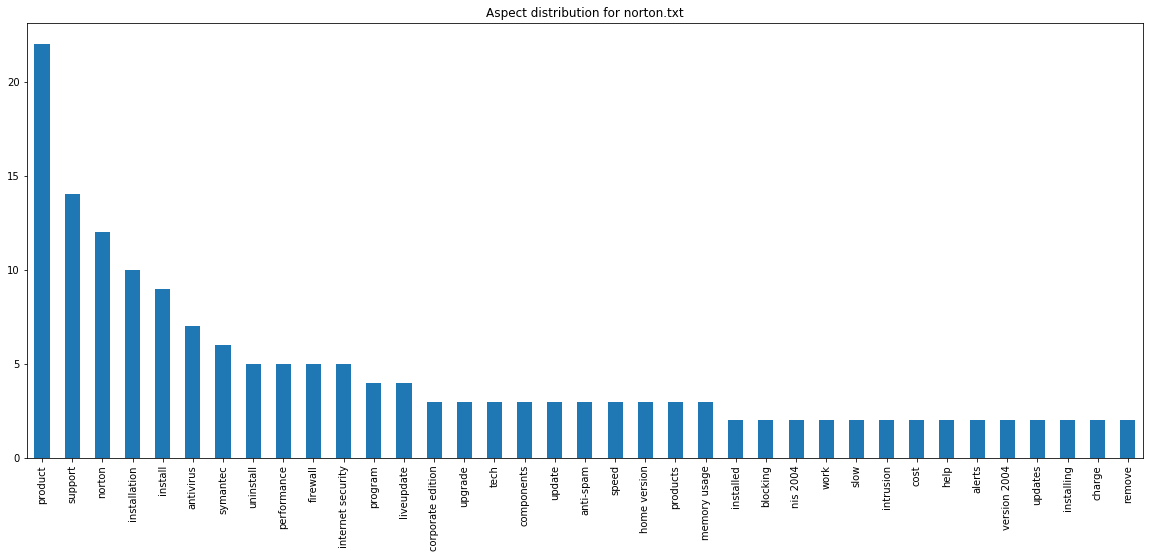

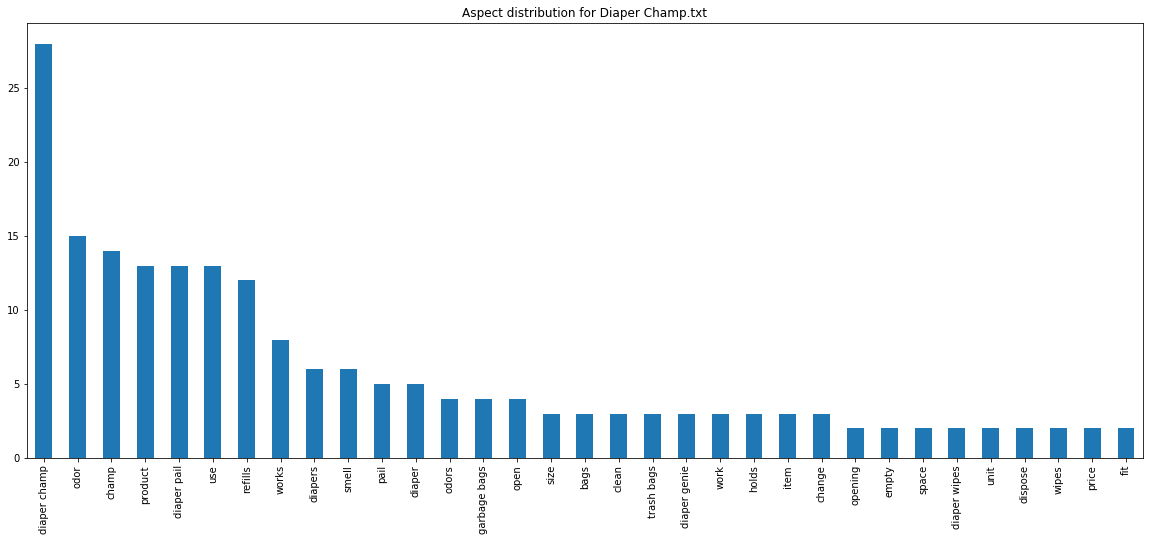

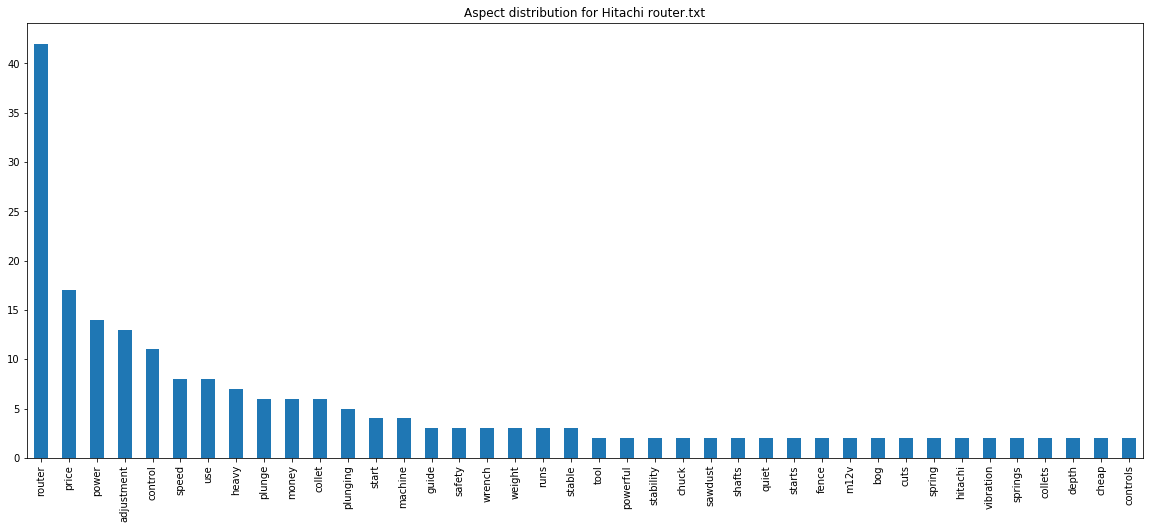

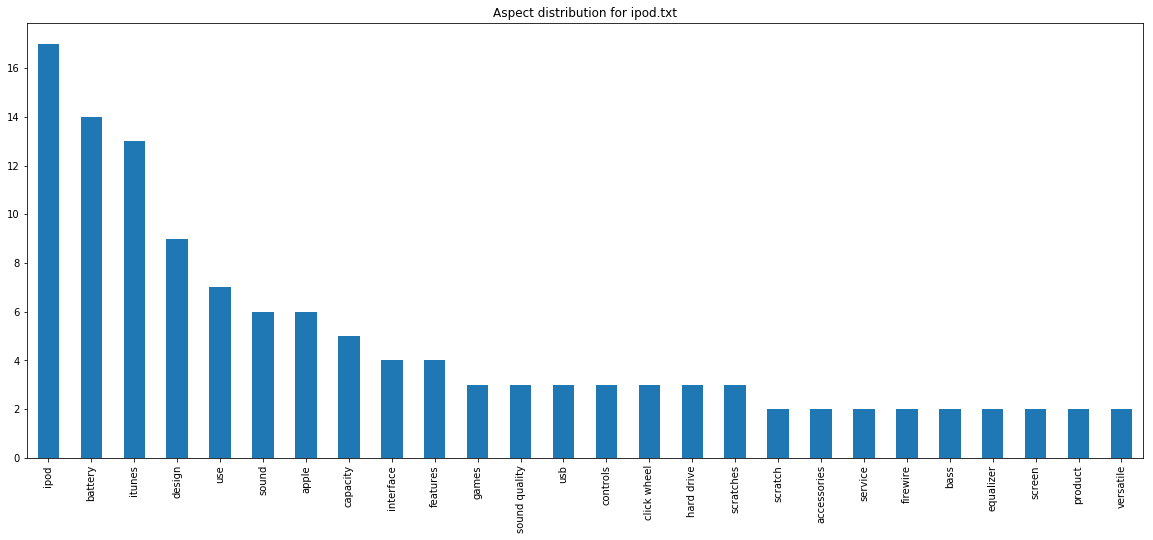

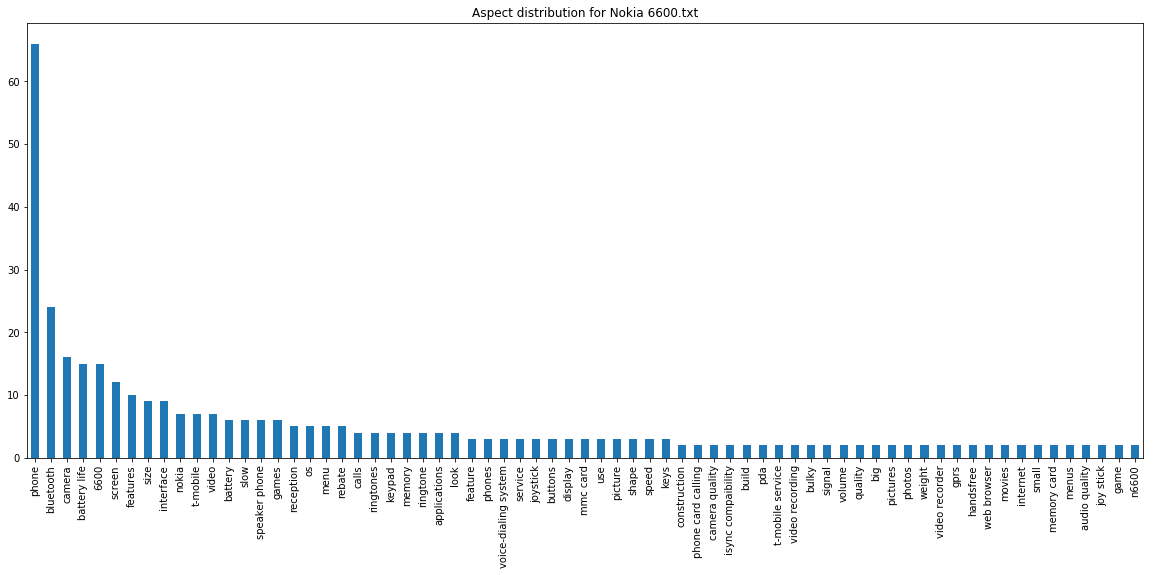

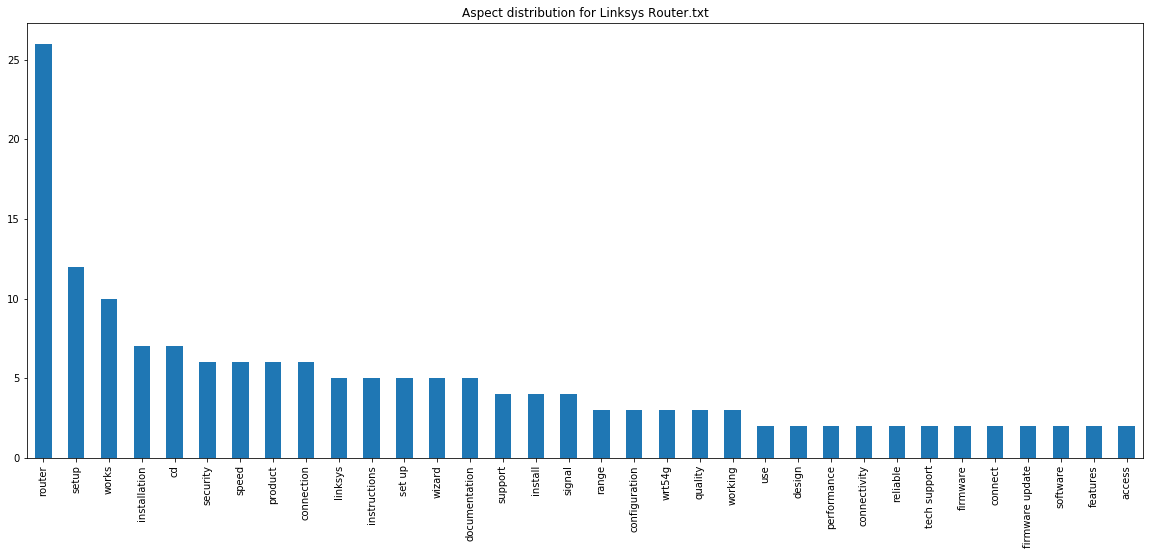

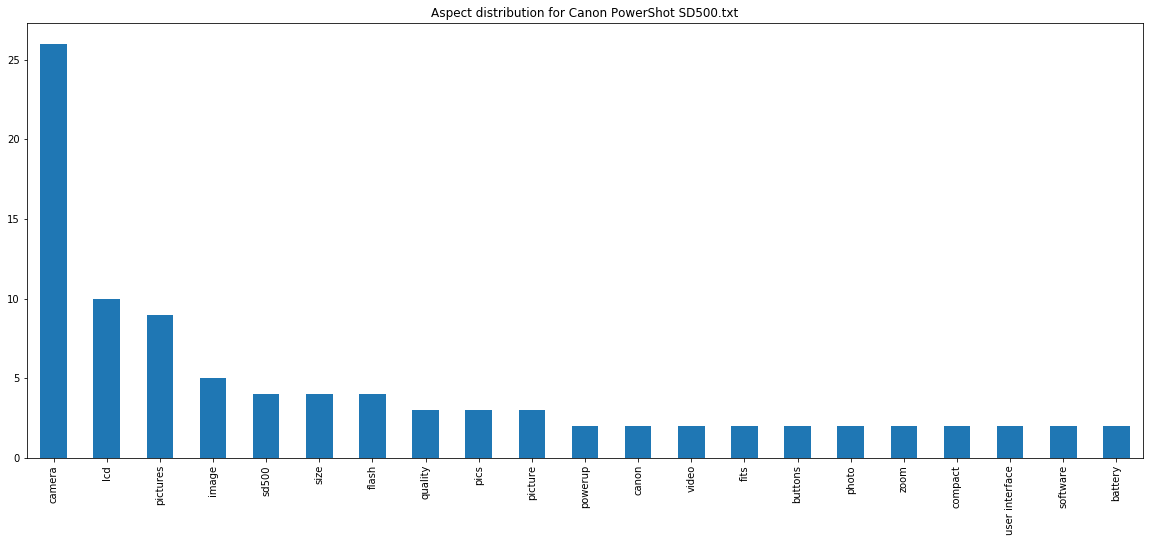

In [62]:
for reviews_path in reviews_paths:
    print(reviews_path)
    draw_aspect_distribution(reviews_path)

In [56]:
def get_number_of_reviews(reviews_path):
    return load_reviews(reviews_path).shape[0]

In [57]:
def get_number_of_reviews_with_aspects(reviews_path):
    return load_reviews(reviews_path).dropna('index').shape[0]

In [67]:
DatasetSize = namedtuple('DatasetSize', 'dataset, size, reviews_word_average, aspect_coverage')

def get_datasets_sizes(reviews_paths):
    return pd.DataFrame([
        DatasetSize(
            dataset=basename(reviews_path), 
            size=get_number_of_reviews(reviews_path),
            reviews_word_average=np.average(load_reviews(reviews_path).text.apply(lambda t: len(t.split()))),
            aspect_coverage=get_number_of_reviews_with_aspects(reviews_path)/get_number_of_reviews(reviews_path)
        )
        for reviews_path in reviews_paths
    ])

/home/lukasz/anaconda2/envs/spoken/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


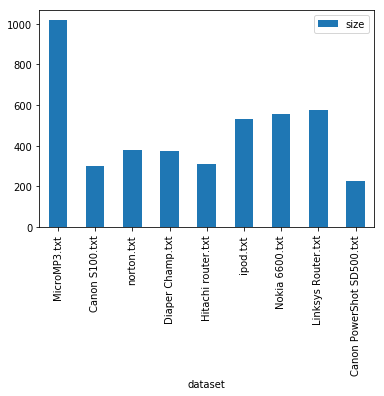

In [68]:
get_datasets_sizes(reviews_paths).plot(kind='bar', x='dataset', y='size')

/home/lukasz/anaconda2/envs/spoken/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


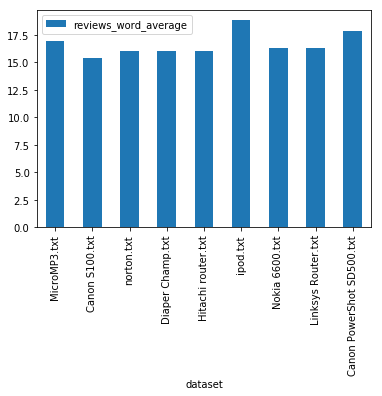

In [314]:
get_datasets_sizes(reviews_paths).plot(kind='bar', x='dataset', y='reviews_word_average')

/home/lukasz/anaconda2/envs/spoken/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


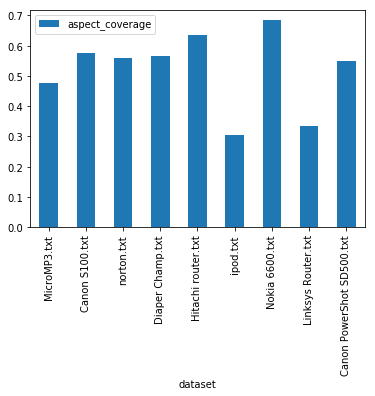

In [69]:
get_datasets_sizes(reviews_paths).plot(kind='bar', x='dataset', y='aspect_coverage')

In [70]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [71]:
le.fit(['ipod', 'battery', 'phone'])

LabelEncoder()

In [72]:
le.classes_

array(['battery', 'ipod', 'phone'], dtype='<U7')

In [75]:
le.transform(['battery', 'ipod', 'ipod', 'battery', 'phone']) 

array([0, 1, 1, 0, 2])

In [76]:
le.inverse_transform([0, 0, 1, 2])

/home/lukasz/anaconda2/envs/spoken/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['battery', 'battery', 'ipod', 'phone'], dtype='<U7')

In [ ]:
def get_aspect_frequency_ranking(reviews_path: str, top_n: int = 10) -> Dict:
    df = get_aspects(reviews_path)
    return df.aspect.value_counts().head(top_n).to_dict()